https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/

In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('hanoi_quality.csv')
df1=df.reset_index()['pm25']

In [3]:
df1.shape

(1920,)

In [4]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [6]:
print(train_size)
print(test_size)

1536
384


In [7]:
print(train_data.shape)
print(test_data.shape)


(1536, 1)
(384, 1)


In [8]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [9]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(ytest.shape)


(1435, 100)
(1435,)
(283, 100)
(283,)


In [11]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [12]:
print(X_train.shape)
print(X_test.shape)

(1435, 100, 1)
(283, 100, 1)


In [13]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0311 - val_loss: 0.0286
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0164 - val_loss: 0.0273
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0151 - val_loss: 0.0264
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0130 - val_loss: 0.0259
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0151 - val_loss: 0.0263
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0128 - val_loss: 0.0264
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0125 - val_loss: 0.0276
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0127 - val_loss: 0.0274
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0119 - val_loss: 0.0276
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0132 - val_loss: 0.0283
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0114 - val_loss: 0.0290
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

In [15]:
# 10. Dự báo dữ liệu test,
train_predict=model.predict(X_train)
y_pred=model.predict(test_data.reshape(test_data.shape[0],test_data.shape[1] , 1))


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [16]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [17]:
ytest=scaler.inverse_transform(test_data)
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(ytest - y_pred)/np.abs(ytest))*100

print('Testing MAPE:', test_mape)

# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

Testing RMSE: 10.691497879476938
Testing MAPE: 19.54896738282472
Testing MAE: 8.868295306960745


In [18]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

(1, 324)

In [19]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
print(x_input.shape)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=324
i=0
while(i<30):

    if(len(temp_input)>324):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


(1, 324)
[0.4225106]
325
1 day input [0.30697674 0.35813953 0.47906977 0.37209302 0.26976744 0.36744186
 0.33488372 0.21395349 0.14418605 0.18604651 0.17209302 0.24651163
 0.34418605 0.28837209 0.34883721 0.32093023 0.26976744 0.24651163
 0.30232558 0.26046512 0.19069767 0.23255814 0.19069767 0.22325581
 0.2372093  0.30697674 0.34418605 0.42790698 0.33023256 0.33953488
 0.24186047 0.26046512 0.3627907  0.39069767 0.28372093 0.41860465
 0.25581395 0.30232558 0.28372093 0.31627907 0.26511628 0.35813953
 0.22325581 0.32093023 0.2        0.27906977 0.2372093  0.4
 0.4744186  0.4744186  0.36744186 0.1627907  0.25581395 0.44651163
 0.41860465 0.26511628 0.31627907 0.44651163 0.40930233 0.42325581
 0.19069767 0.13488372 0.22790698 0.34883721 0.35348837 0.29302326
 0.22325581 0.13488372 0.15348837 0.15348837 0.1627907  0.26046512
 0.39069767 0.34883721 0.14883721 0.19069767 0.36744186 0.47906977
 0.31627907 0.34883721 0.41395349 0.40930233 0.32093023 0.30232558
 0.26976744 0.18139535 0.2837209

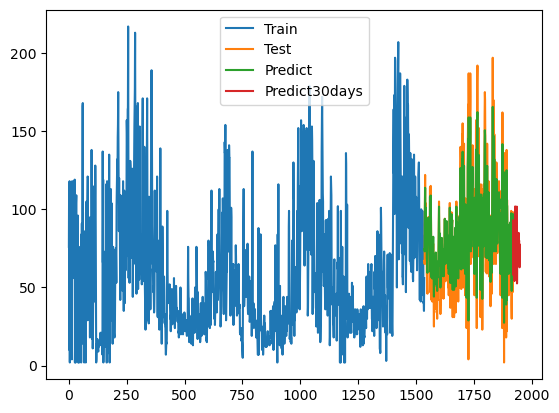

In [20]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,y_pred)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

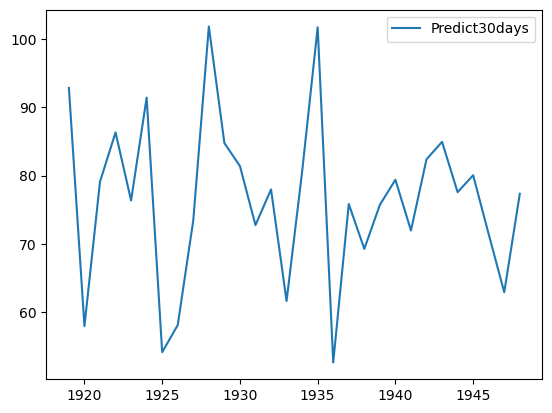

In [21]:
# 14.Vẽ hình
# Dự đoán 30 ngày tiếp theo
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Predict30days'])
plt.show()

In [22]:
print(scaler.inverse_transform(lst_output))

[[ 92.83977774]
 [ 57.92902392]
 [ 79.08287671]
 [ 86.31933984]
 [ 76.34123591]
 [ 91.4258669 ]
 [ 54.10815199]
 [ 58.0803242 ]
 [ 73.4334102 ]
 [101.85029161]
 [ 84.76233673]
 [ 81.39279303]
 [ 72.73613971]
 [ 77.96855491]
 [ 61.60942745]
 [ 80.56226578]
 [101.73311126]
 [ 52.59904173]
 [ 75.82743135]
 [ 69.25204915]
 [ 75.70789304]
 [ 79.38614365]
 [ 71.94305789]
 [ 82.38002208]
 [ 84.93745369]
 [ 77.55969879]
 [ 80.04270729]
 [ 71.39781174]
 [ 62.89175388]
 [ 77.32913774]]
